# Inicialización de entorno

Carga de Paquetes

In [ ]:
from google.colab import files,drive
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import recall_score,fbeta_score,make_scorer,confusion_matrix,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


Incorporar achivo de Bookings desde Google Drive

In [ ]:
drive.mount('/content/drive')
df_bookings = pd.read_csv('/content/drive/My Drive/Maestria - Cuatrimestre I/AA/hotel_bookings.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Análisis Exploratorio

En primer lugar se procedió a la creación de una función que permitiera realizar un simple análisis explorario dado un dataframe y una variable del mismo. 

Se buscó contabilizar nulos (como porcentaje total del data set), contabilizar cuántos valores únicos existían en el feature, y el procentaje total que correspondían cada uno de éstos últimos del dataset.

In [ ]:
def analisis_exploratorio(df, column):
  unique_p = df[column].value_counts()/len(df)
  nulls = (len(df) - df[column].count())/len(df)
  unique = df[column].nunique()

  return unique_p, nulls, unique 

Se iteró a través de todos las columnas del dataset provisto utilizando la función definida anteriormente analisis_exploratorio.

In [ ]:
for column in df_bookings:
  unique_p, nulls, unique = analisis_exploratorio(df_bookings, column)
  print("Nulos: ", nulls, '\n', "Cantidad valores unicos: ", unique, '\n', "Valores únicos % ", '\n', unique_p)

Nulos:  0.0 
 Cantidad valores unicos:  2 
 Valores únicos %  
 City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64
Nulos:  0.0 
 Cantidad valores unicos:  2 
 Valores únicos %  
 0    0.629584
1    0.370416
Name: is_canceled, dtype: float64
Nulos:  0.0 
 Cantidad valores unicos:  479 
 Valores únicos %  
 0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
         ...   
458    0.000008
371    0.000008
737    0.000008
435    0.000008
387    0.000008
Name: lead_time, Length: 479, dtype: float64
Nulos:  0.0 
 Cantidad valores unicos:  3 
 Valores únicos %  
 2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64
Nulos:  0.0 
 Cantidad valores unicos:  12 
 Valores únicos %  
 August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
Decem

El resultado del análisis exploratorio se puede encontrar debajo. 


| Variable                       | Tipo de dato        | Nulos % | Cantidad de Valores Unicos | Valores únicos %                                                                                                                  |
|--------------------------------|---------------------|---------|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| hotel                          | categórica          | 0.00%   | 2                          | City Hotel   0.664461       Resort Hotel 0.335539                                                                                 |
| is_canceled                    | bool                | 0.00%   | 2                          | 0 0.629584         1 0.370416                                                                                                     |
| lead_time                      | numerica            | 0.00%   | 479                        | …                                                                                                                                 |
| arrival_date_year              | numerica            | 0.00%   | 3                          | 2015    0.184237      2016    0.474973      2017    0.340791                                                                      |
| arrival_date_month             | categórica/ordinal  | 0.00%   | 12                         | …                                                                                                                                 |
| arrival_date_week_number       | numerica            | 0.00%   | 53                         | …                                                                                                                                 |
| arrival_date_day_of_month      | numerica            | 0.00%   | 31                         | …                                                                                                                                 |
| stays_in_weekend_nights        | numerica            | 0.00%   | 17                         | …                                                                                                                                 |
| stays_in_week_nights           | numerica            | 0.00%   | 35                         | …                                                                                                                                 |
| adults                         | numerica            | 0.00%   | 14                         | …                                                                                                                                 |
| children                       | numerica            | ~0      | 5                          | …                                                                                                                                 |
| babies                         | numerica            | 0.00%   | 5                          | …                                                                                                                                 |
| meal                           | categórica          | 0.00%   | 5                          | BB           0.773180      HB           0.121141      SC           0.089203      Undefined    0.009791      FB           0.006684 |
| country                        | categórica          | 0.40%   | 117                        | …                                                                                                                                 |
| market_segment                 | categórica          | 0.00%   | 8                          | Online TA        0.473046      Offline TA/TO    0.202856      Groups           0.165935      Direct           0.105587      ….    |
| distribution_channel           | categórica          | 0.00%   | 5                          | TA/TO        0.819750      Direct       0.122665      Corporate    0.055926                                                       |
| is_repeated_guest              | bool                | 0.00%   | 2                          | 0    0.968088      1    0.031912                                                                                                  |
| previous_cancellations         | numerica            | 0.00%   | 15                         | 0 0.945691         1 0.050683      …                                                                                              |
| previous_bookings_not_canceled | numerica            | 0.00%   | 73                         | 0     0.969679      1     0.012916      …                                                                                         |
| reserved_room_type             | categorica          | 0.00%   | 10                         | A 0.720278         D 0.160826       E 0.054737      …                                                                             |
| assigned_room_type             | categorica          | 0.00%   | 12                         | A 0.620261         D 0.212095       E 0.065382      …                                                                             |
| booking_changes                | numerica            | 0.00%   | 21                         | 0 0.848597         1 0.106382      …                                                                                              |
| deposit_type                   | categorica          | 0.00%   | 3                          | No Deposit   0.876464       Non Refund 0.122179       Refundable 0.001357                                                         |
| agent                          | numerica/categorica | 13.00%  | 333                        | …                                                                                                                                 |
| company                        | numerica/categorica | 94.00%  | 352                        | …                                                                                                                                 |
| days_in_waiting_list           | numerica            | 0.00%   | 128                        | …                                                                                                                                 |
| customer_type                  | categorica          | 0.00%   | 4                          | Transient          0.750591      Transient-Party    0.210436      Contract           0.034140      Group              0.004833    |
| adr                            | numerica            | 0.00%   | 8879                       | …                                                                                                                                 |
| required_car_parking_spaces    | numerica            | 0.00%   | 5                          | 0 0.937884         1 0.061839      …                                                                                              |
| total_of_special_requests      | numerica            | 0.00%   | 6                          | 0 0.588977         1 0.278298       2 0.108627      …                                                                             |
| reservation_status             | categorica          | 0.00%   | 3                          | Check-Out   0.629584       Canceled 0.360307       No-Show 0.010110                                                               |
| reservation_status_date        | fecha               | 0.00%   | 926                        | …                                                                                                                                 |

Respecto al análisis de valores faltantes, se encontraron los siguientes casos:


*   El feature company presenta un 94% de valores nulos
*   El feature agent presenta un 13% de valores nulos
*   El feature country presenta un 0.4% de valores nulos
*   El feature children presenta 4 casos de valores nulos

Se decidió tratar los valores faltantes de diversas maneras. En el caso de company, y debido a la gran presencia de valores nulos, se decidió no incorporar este feature en el análisis y por ende dropear la columna.


En el caso de agent se procedió a asignar un valor ficticio generado por el equipo. Esta decisión fue tomada en base a que esta columna puede adoptar 333 distintos valores, y adoptar el más frecuente hubiera sido contraproducente para la predicción.


Finalmente, para tratar a los casos donde se encontraba el valor de children no informado, se procedió a completar los mismos con el valor 0, asumiendo que en ese caso la reserva no contaba con niños.


#**Preprocesamiento de datos**

**Eliminación de features**

Para comenzar a construir el árbol de decisión, se primero reemplazar los valores faltantes con las estrategias explicadas anteriormente.



In [ ]:
df_bookings_deleted = df_bookings.copy()
#company --> se eliminó la columna
df_bookings_deleted = df_bookings_deleted.drop(['company'], axis = 1)
#Children --> Se asumió que los NA serían completados con 0
df_bookings_deleted['children']= df_bookings_deleted['children'].fillna(0)
#agent --> Se le asignó a los NA el valor dummy 0 y se la volvió categórica
df_bookings_deleted['agent'] = df_bookings_deleted['agent'].fillna(0)
df_bookings_deleted['agent'] = pd.Categorical(df_bookings_deleted['agent'])

**Construcción de variables**

Como último paso antes de comenzar a trabajar con el árbol de decisión, se procedió a mapear los meses (que actualmente poseen una descripción del tipo texto) a una variable del tipo ordinal.

In [ ]:
# Mapeo de Mes
df_bookings_deleted['arrival_date_month'] = df_bookings_deleted['arrival_date_month'].map(
                                                            {'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

# **Análisis de correlaciones**
En primer lugar se procedió a ralizar el análisis de correlación entre las varibles numéricas del dataframe y la variblae is_canceled.

Se puede observar debajo que las 4 variables que más se correlacionan con la cancelación de la reserva son:


*   lead_time
*   total_of_special_requests
*   required_car_parking_spaces
*   booking_changes



In [ ]:
cancel_corr = df_bookings.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

Debido a la imposibilidad de Calcular correlaciones con variables categóricas, se utilizó el coeficiente de V de Cramer como medida de asociación. Se define la función y se la aplica a las variables categóricas. Previamente se categoriza la variable "Agent" debido a que Pandas lo interpreta como Int al cargar el .csv

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)   # Matriz de contingencia
    chi2 = chi2_contingency(confusion_matrix)[0]   
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
data_cor = df_bookings_deleted.copy()  
data_cor_categoricas = data_cor.select_dtypes(['object','category'])
data_cor_categoricas = data_cor_categoricas.drop('reservation_status_date',axis=1)


correlaciones_categoricas = []
for (colname,Data) in data_cor_categoricas.iteritems():
  Cramer= cramers_v(Data,data_cor['is_canceled'])
  correlaciones_categoricas.append([colname,Cramer])
correlaciones_categoricas = pd.DataFrame(correlaciones_categoricas, columns=['Column','Cramer'])
print(correlaciones_categoricas.sort_values(by = 'Cramer'))
 

                  Column    Cramer
1                   meal  0.050148
5     reserved_room_type  0.073150
9          customer_type  0.136347
0                  hotel  0.136483
4   distribution_channel  0.177034
6     assigned_room_type  0.202748
3         market_segment  0.266672
2                country  0.358233
8                  agent  0.382334
7           deposit_type  0.481464
10    reservation_status  0.999996


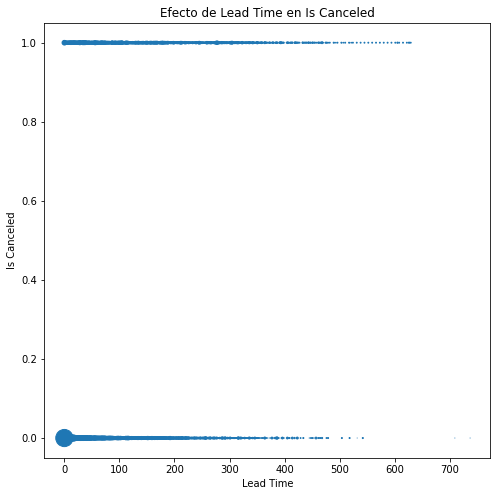

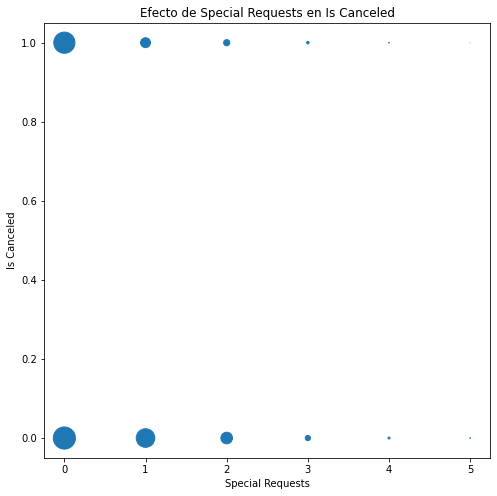

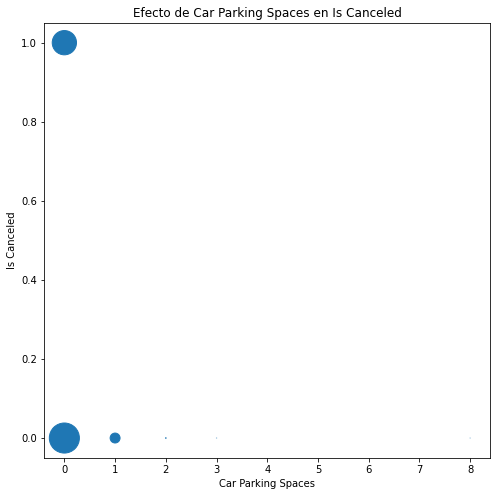

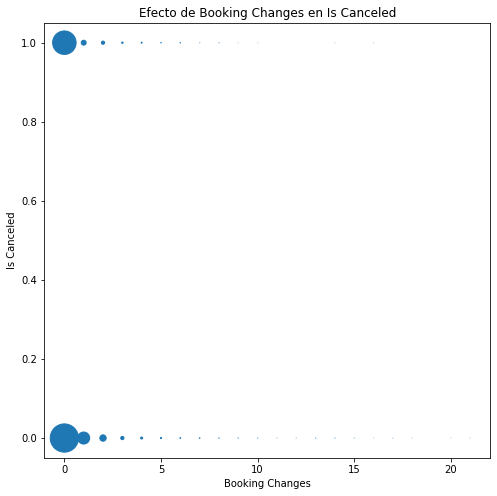

In [ ]:
##Preparación de variabes

df_cancel_lt = df_bookings[['lead_time','is_canceled']]
df_cancel_lt = df_cancel_lt.groupby(["lead_time", "is_canceled"]).size().reset_index(name="times")

df_cancel_sr = df_bookings[['total_of_special_requests','is_canceled']]
df_cancel_sr = df_cancel_sr.groupby(["total_of_special_requests", "is_canceled"]).size().reset_index(name="times")

df_cancel_cps = df_bookings[['required_car_parking_spaces','is_canceled']]
df_cancel_cps = df_cancel_cps.groupby(["required_car_parking_spaces", "is_canceled"]).size().reset_index(name="times")

df_cancel_bc = df_bookings[['booking_changes','is_canceled']]
df_cancel_bc = df_cancel_bc.groupby(["booking_changes", "is_canceled"]).size().reset_index(name="times")

#función para imprimir
def show_custom_scatter(data, x,y,s,s_scale,xlab, ylab, title):
  plt.figure(figsize=(8, 8))
  plt.scatter(x = data[x], y= data[y], s = data[s] * s_scale)
  plt.ylabel(ylab)
  plt.xlabel(xlab)
  plt.title(title)
  plt.show()

#imprimir gráficos
show_custom_scatter(data=df_cancel_lt, x = 'lead_time', y= 'is_canceled', s = 'times', s_scale=1/20, ylab='Is Canceled', 
                    xlab='Lead Time', title='Efecto de Lead Time en Is Canceled')

show_custom_scatter(data=df_cancel_sr, x = 'total_of_special_requests', y='is_canceled', s = 'times', s_scale=1/75, 
                    ylab='Is Canceled', xlab='Special Requests', title='Efecto de Special Requests en Is Canceled')

show_custom_scatter(data=df_cancel_cps, x = 'required_car_parking_spaces', y= 'is_canceled', s = 'times', s_scale=1/75,
                    ylab='Is Canceled', xlab='Car Parking Spaces', title='Efecto de Car Parking Spaces en Is Canceled')

show_custom_scatter(data=df_cancel_bc, x = 'booking_changes', y= 'is_canceled', s = 'times', s_scale=1/75,
                    ylab='Is Canceled', xlab='Booking Changes', title='Efecto de Booking Changes en Is Canceled')

Por último se procedió a comprobar si la variable target se encontraba balanceada. Se obtuvo que el dataset contiene un 37% de reservas canceladas y un 63% de reservas no canceladas.

In [ ]:
df_bookings['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

## **Construcción del árbol de decisión**

**Generación de dummies y eliminación de features**

Finalmente, se decidió eliminar la variable *reservation_status* dado que la misma posee estricta correlación con la variable target. Todas las reservadas canceladas poseen los estados *Canceled* o *No Show* mientras que todas las reservas que efectivamente ocurrieron poseen el estado *Check Out*.

En segunda instancia se decidieron elimar las variables relacionadas con temporalidad pasada, dado que las mismas no ayudarían a predecir comportamiento futuro. Por este motivo se procedió a descartar las variables *reservation_status_date* y *arrival_date_year*.

Adicionalmente, y debido a la gran cantidad de valores únicos que podían adoptarse, se decidió eliminar también las variables *agent* y *country*.

Para aquellas variables categóricas que quedaron en el modelo, se procedió a la creación de dummies para poder utilizarlos de dicha manera en el algoritmo.

In [ ]:
# Preproceso para eliminar variables de baja correlacion
data_tree = df_bookings_deleted.copy()
data_tree = data_tree.drop(columns=['reservation_status_date','arrival_date_year','reservation_status','agent','country'])

data_tree = pd.get_dummies(data=data_tree, columns= ['hotel','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type', 'customer_type','deposit_type'])
y = data_tree["is_canceled"]
X = data_tree.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

**Elección de métrica de performance**

Debido a la inquietud del dueño del hotel de intentar predecir con antelación la cancelación de una reserva, se prioriza maximizar la relación entre los positivos correctamente predecidos y el total de positivos. Esto se puede llevar a cabo utilizando como métrica de performance el *recall*. El equivalente a Fβ-Score con β tendiendo a infinito.

Es por esto que al utilizar un Fβ-Score, el β propuesto a utilizar tiene que ser mayor a 1, para priorizar el *recall* ante la *precision*. 

# **Encontrar el mejor árbol de decisión**

Para encontrar el mejor árbol de decisión se procedió a trabajar con un grid search y la metodología Cross Validation donde se fueron variando los parámetros *criterion*, *max_depth* y *ccp_alpha*.

Se comenzó con un set de parámetros bastante amplios y se fue refinando con cada iteración.

El resultado final, que se encuentra debajo fue la última iteración realizada, donde se definió que los mejores hiperparámetros eran los siguientes.


*   criterion = gini
*   max_depth = 33
*   ccp_alpha = 0.0



In [ ]:
params_grid = {'criterion':['entropy','gini'],
              'max_depth':list(np.linspace(32,33,num=5 ,endpoint=False)),
               'ccp_alpha': list(np.linspace(0,0.01,num=10,endpoint=False)) }

kfoldcv = StratifiedKFold(n_splits=5)
base_tree = tree.DecisionTreeClassifier()
scorer_fn = make_scorer(recall_score)
gridcv = GridSearchCV(estimator=base_tree, param_grid= params_grid,scoring=scorer_fn,cv=kfoldcv)
gridcv.fit(X_train,y_train);
kfolds_results = pd.DataFrame(gridcv.cv_results_)
# Me quedo con el mejor arbol
best_tree = gridcv.best_estimator_
# Veo los parámetros
print(gridcv.best_params_)

Hiper-parámetros del mejor árbol encontrado

In [ ]:
best_params = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 33.0}
best_tree = tree.DecisionTreeClassifier(**best_params,random_state= 1)
best_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=33.0, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

**Entrenamiento del árbol con los hiperparámetros seleccionados**

Una vez obtenidos los hiperparámetros, se procedió a entrenar y testear realizando 50 particiones distintas al modelo.

Se testeó en cada iteración la métrica elegida *recall*. El output del análisis se encuentra en el gráfico de cajas y bigotes, donde se puede apreciar que el mismo durante el training tiene un valor medio de 0,98, mientras que durante el testing tiene un valor medio de 0,76.

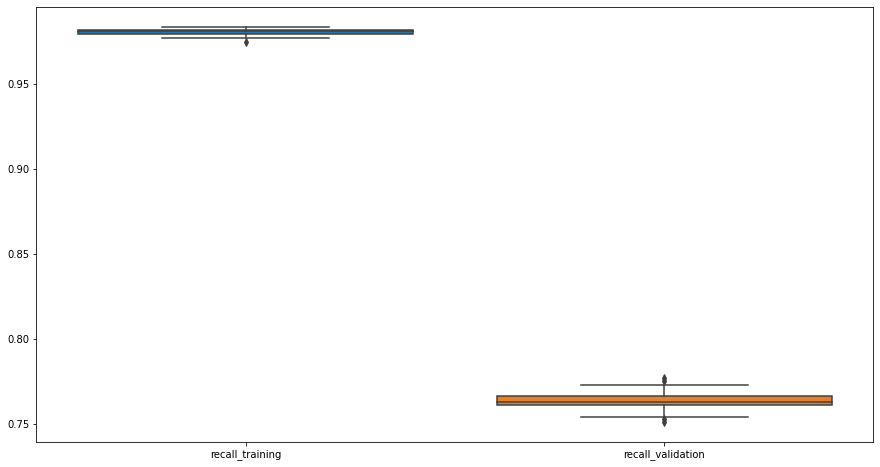

In [ ]:
n_iter = 50 
recall_training =[]
recall_val = []
for i in range(n_iter):    # Entreno y testeo por cada iteracion
  X_train_g1, X_val_g1, y_train_g1, y_val_g1 = train_test_split(X_train,y_train,test_size = 0.2, random_state = i)
  arbol_sklearn = tree.DecisionTreeClassifier(**best_params)
  arbol_sklearn.fit(X_train_g1,y_train_g1)
  y_pred_train_g1 = arbol_sklearn.predict(X_train_g1)
  y_pred_val_g1 = arbol_sklearn.predict(X_val_g1)
  recall_training.append(recall_score(y_train_g1,y_pred_train_g1))
  recall_val.append(recall_score(y_val_g1,y_pred_val_g1))
#print(recall_training)
recalls = recall_training+recall_val
recalls_axis = ['recall_training']*len(recall_training)+ ['recall_validation']*len(recall_val)
plt.figure(figsize=(15,8))
sns.boxplot(recalls_axis,recalls)
plt.savefig("Splits 80-20 con 50 iteraciones - boxplots.svg")

Posteriormente también se realizó una validación cruzada de 50 iteraciones y se comprobó la performance del *recall*. 

                          0
split0_test_score  0.767278
split1_test_score  0.763047
split2_test_score  0.802539
split3_test_score  0.798307
split4_test_score  0.761636
split5_test_score  0.770099
split6_test_score  0.774330
split7_test_score  0.775740
split8_test_score  0.771509
split9_test_score  0.732017


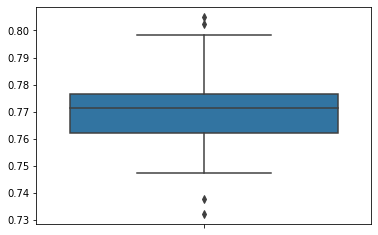

In [ ]:
params_grid = {'criterion':['gini'],
               'max_depth': [33],
               'ccp_alpha': [0] }

kfoldcv = StratifiedKFold(n_splits=50)
base_tree = tree.DecisionTreeClassifier()
scorer_fn = make_scorer(recall_score)
randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=1)
randomcv.fit(X_train,y_train);
kfolds_results = pd.DataFrame(randomcv.cv_results_)
filter_col = [col for col in kfolds_results  if col.startswith('split')]
print(kfolds_results[filter_col].T.head(10))
sns.boxplot(y=kfolds_results[filter_col])

**Matriz de confusión**

Adicionalmente, una vez definido el tree, se procedió a analizar la matriz de confusión de los resultados predichos.

Los resultados se encuentran disponibles en gráfico debajo. Se obtuvo un recall aproximado del 77%.

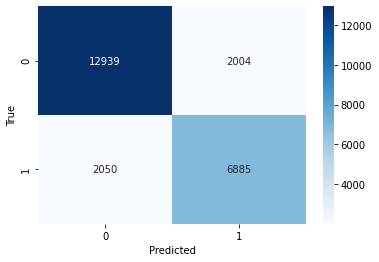

In [ ]:
best_tree = tree.DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)

y_pred = best_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Detalle del árbol final**

En el gráfico que se encuentra debajo se puede apreciar los nodos superiores del árbol entrenado para dar solución al problema planteado.

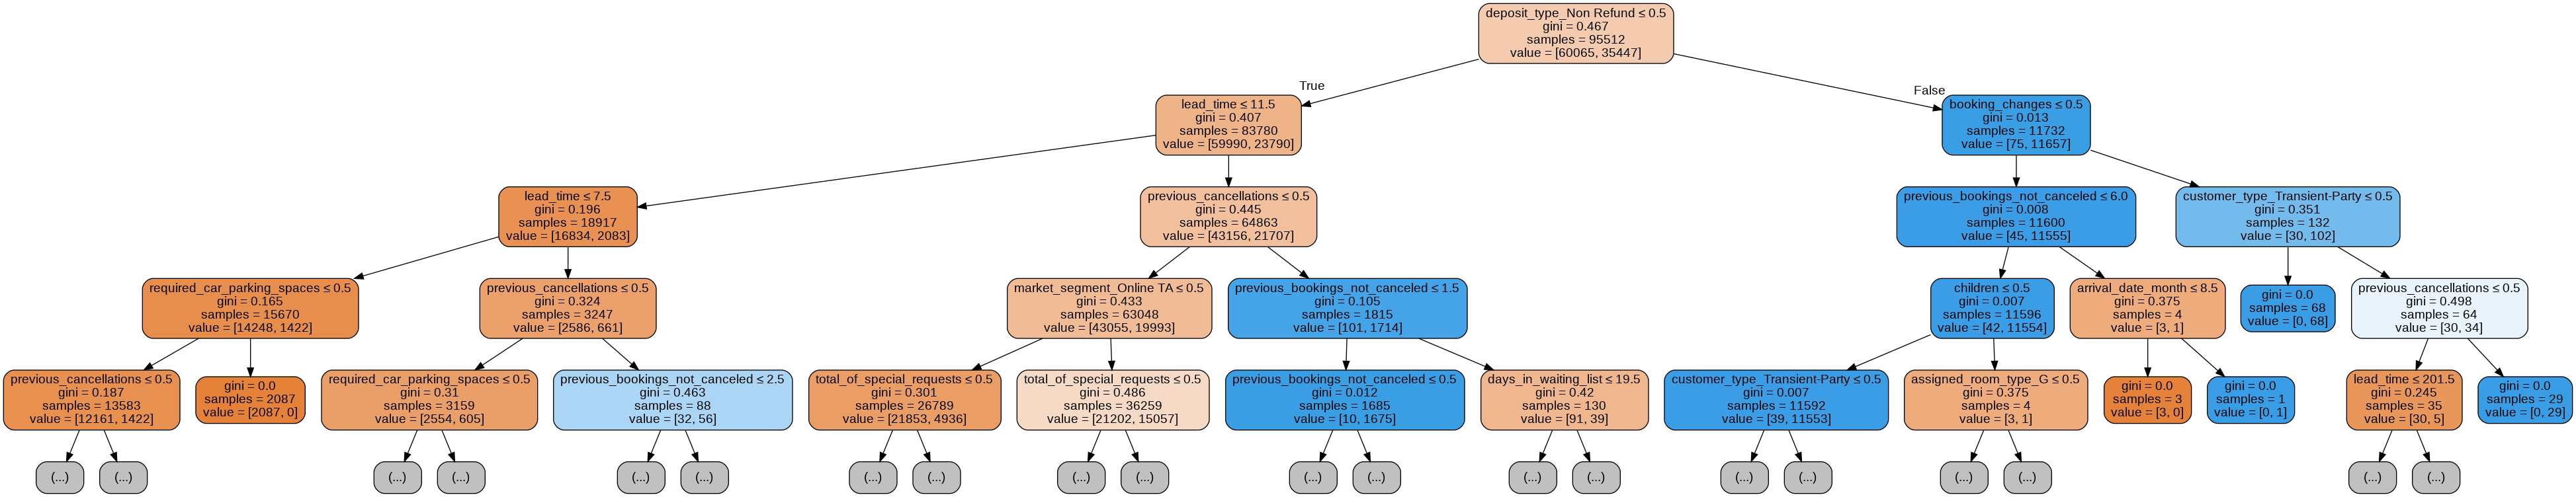

In [ ]:
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data,
                feature_names=list(X_train),   
                filled=True, rounded=True,
                special_characters=True,
                max_depth = 4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Poda del árbol

Usando validación cruzada de 10 iteraciones se probaron distintos valores de α para comprender los efectos de la poda.

In [ ]:
# Grilla única para probar alphas 
alpha = [0.002,0.02,0.1]
params_grid_i = {'criterion':['gini'],
              'max_depth': [33],
               'ccp_alpha': alpha }

kfoldcv = StratifiedKFold(n_splits=10)
base_tree_i = tree.DecisionTreeClassifier()
scorer_fn_i = make_scorer(recall_score)
gridcv_i = GridSearchCV(estimator=base_tree_i, param_grid = params_grid_i,scoring=scorer_fn_i,cv=kfoldcv)
gridcv_i.fit(X_train,y_train);
kfolds_results_i = pd.DataFrame(gridcv_i.cv_results_)

filter_col_i = [col for col in kfolds_results_i  if col.startswith('split')]
print(kfolds_results_i[filter_col_i].T.head(10))

                          0         1         2
split0_test_score  0.603331  0.321852  0.321852
split1_test_score  0.605025  0.337662  0.337662
split2_test_score  0.593053  0.319966  0.319966
split3_test_score  0.589382  0.318836  0.318836
split4_test_score  0.605761  0.342841  0.342841
split5_test_score  0.599548  0.323637  0.323637
split6_test_score  0.592206  0.323920  0.323920
split7_test_score  0.613668  0.328721  0.328721
split8_test_score  0.615471  0.333992  0.333992
split9_test_score  0.603049  0.329757  0.329757


Como siguiente paso, se probó podar el árbol obtenido con diferentes valores de α (desde 0.0 a 0.000045) y medir cuánto variaba el *recall* en base al mismo.

Para ello se iteró 10 veces utilizando el mejor árbol y se guardaron los resultados para cada uno de ellos.

Como se puede observar en el gráfico debajo, la predicción empeora a medida que el α crece (con excepción de α = 0.000005).

Se graficó también cómo disminuía la profundidad del árbol a medida que el α iba incrementando. Este detalle puede encontrarse en la segunda figura. Partiendo de un total de 33 niveles con α = 0.0, y arribando a un total de 26 niveles con α = 0.000045.

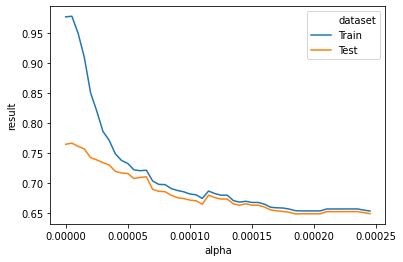

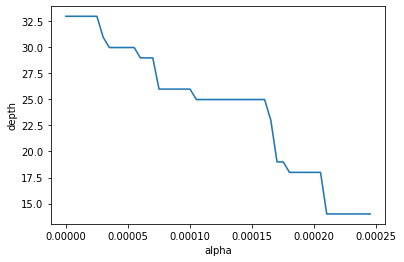

In [ ]:
df_results_recall = []

for alpha in range(0, 50, 1):
  factor=200000  # Para dividir el range
  arbol_sklearn = tree.DecisionTreeClassifier(criterion='gini',max_depth=33,min_samples_leaf=1, ccp_alpha=alpha/factor, random_state= 1 )
  arbol_sklearn.fit(X_train,y_train)
  y_pred_test = arbol_sklearn.predict(X_test)
  y_pred_train = arbol_sklearn.predict(X_train)

  df_results_recall.append((recall_score(y_train,y_pred_train), 'Train',  alpha/factor,arbol_sklearn.get_depth()))
  df_results_recall.append((recall_score(y_test,y_pred_test), 'Test', alpha/factor, arbol_sklearn.get_depth()))

df_results_recall = pd.DataFrame(df_results_recall, columns = ['result', 'dataset', 'alpha','depth'])

# Como evoluciona la métrica?
sns.lineplot(x = 'alpha', y = 'result', hue = 'dataset' , markers=True, data = df_results_recall)
plt.show()

# Como varían la cantidad de nodos del árbol?
sns.lineplot(x='alpha', y='depth', data=df_results_recall )

Otro paso realizado en el análisis fue la comparación de la capacidad de predicción del árbol comparando el mejor α con el árbol sin poda. 

Debajo se encuentra el detalle de dicha actividad.

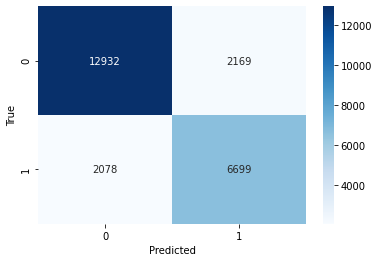

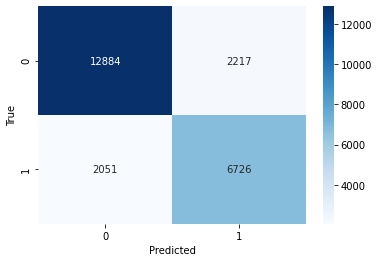

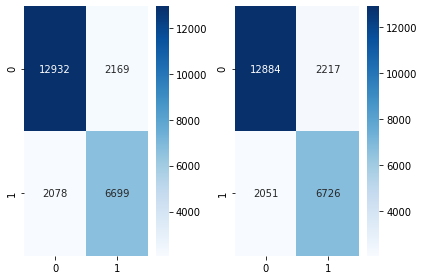

In [ ]:
best_tree = tree.DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#alpha = 0.000005
parameters = best_params #para copiarnos los mejores parametros
parameters['ccp_alpha'] = 0.000005
tree_alpha_0 = tree.DecisionTreeClassifier(**parameters, random_state= 1)
tree_alpha_0.fit(X_train, y_train)
y_pred_alpha_0 = tree_alpha_0.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred_alpha_0)
sns.heatmap(cm2, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

(fig, axes) = plt.subplots( ncols=2, tight_layout=True)  #tight-layout evita que se superpongan
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g',ax=axes[0])
sns.heatmap(cm2, cmap='Blues',annot=True,fmt='g',ax=axes[1])
plt.savefig("heatmap.pdf")


**Identificación de features mas relevantes**

Para la identificación de los features más relevantes, se realizó el siguiente gráfico donde se muestra la importancia (en %) de cada uno de ellos. En el top tres encontramos:


*   deposit_type: Not Refound
*   lead_time
*   adr



Text(0.5, 0, 'Feature Importances (%)')

<Figure size 1440x1440 with 0 Axes>

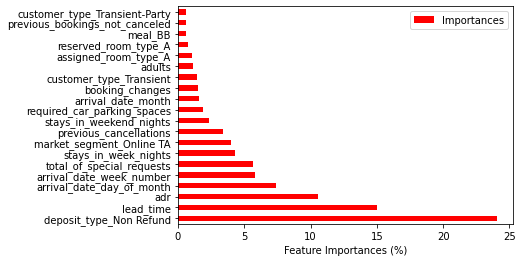

In [ ]:
plt.figure(figsize=(20, 20))
pd.DataFrame(data = best_tree.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")
plt.xlabel("Feature Importances (%)")

Utilizando únicamente los tres features más significativos se reconstruyó el árbol.

Se arrivó a un total de performance de *recall* de 39% aproximadamente.

0.39960345560118965
0.39645700190604327


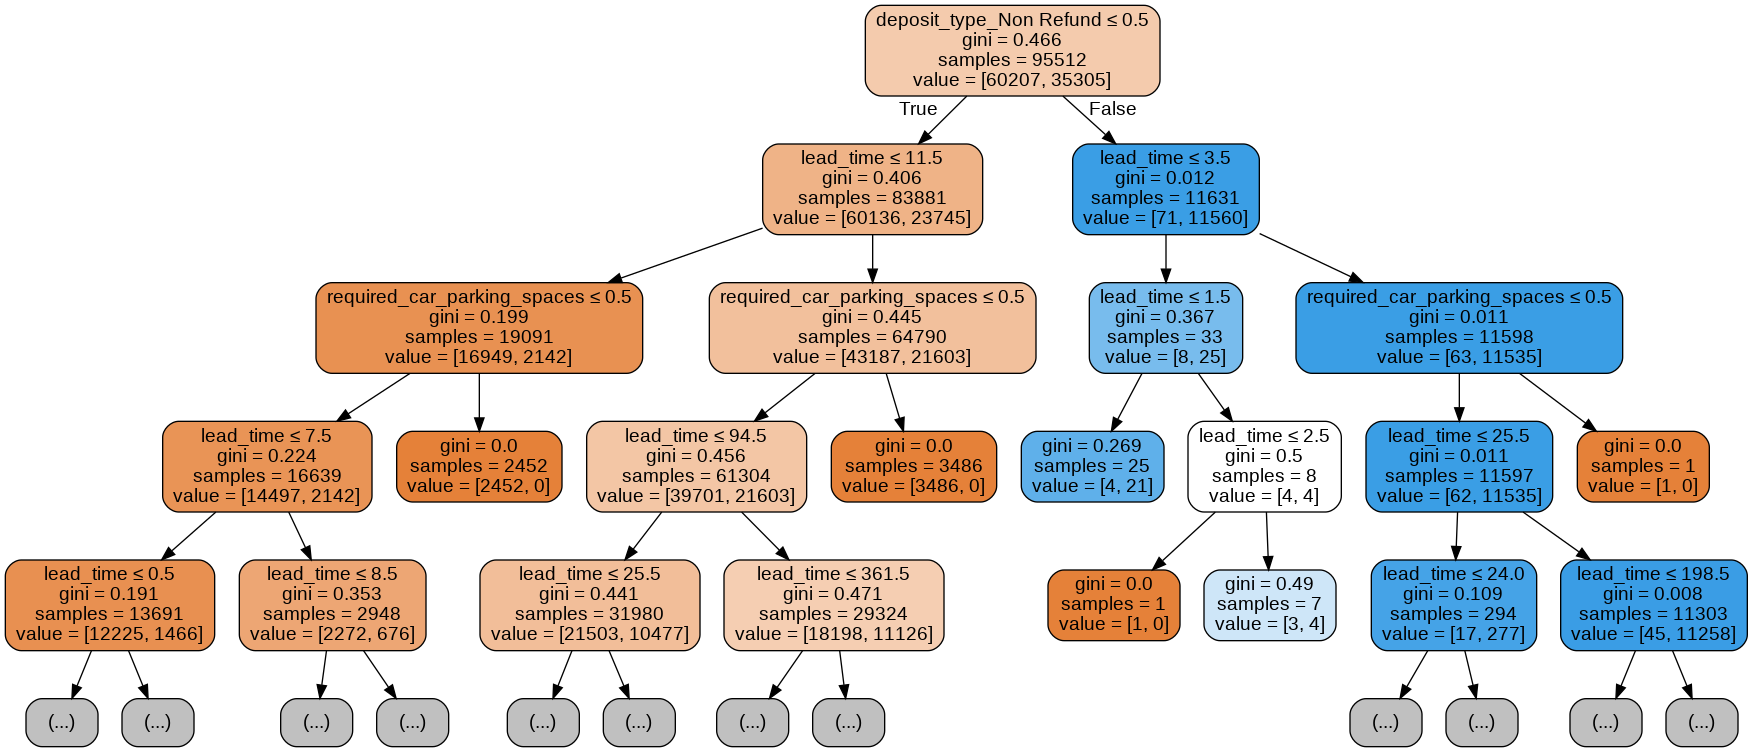

In [ ]:
data_tree_best_features = data_tree.copy()
data_tree_best_features = data_tree_best_features[['lead_time', 'deposit_type_Non Refund', 'required_car_parking_spaces', 'is_canceled']]

y_bf = data_tree_best_features["is_canceled"]
X_bf = data_tree_best_features.drop(["is_canceled"], axis=1)

X_train_bf, X_test_bf, y_train_bf, y_test_bf = train_test_split(X_bf,y_bf,test_size = 0.2, random_state = 60)
arbol_sklearn_bf = tree.DecisionTreeClassifier(**best_tree.get_params())
arbol_sklearn_bf.fit(X_train_bf,y_train_bf)
y_pred_train_bf = arbol_sklearn_bf.predict(X_train_bf)
y_pred_test_bf = arbol_sklearn_bf.predict(X_test_bf)
print(recall_score(y_train_bf,y_pred_train_bf))
print(recall_score(y_test_bf,y_pred_test_bf))


dot_data = StringIO()
export_graphviz(arbol_sklearn_bf, out_file=dot_data,
                feature_names=list(X_train_bf),   
                filled=True, rounded=True,
                special_characters=True,
                max_depth = 4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
